<a href="https://colab.research.google.com/github/Tasniyaa/ML-Assignment/blob/main/ML_LabFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Flatten,MaxPool2D,Convolution2D
from keras.preprocessing.image import ImageDataGenerator


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
from zipfile import ZipFile
with ZipFile ('/content/drive/MyDrive/CNN_dataset.zip', 'r') as zipOBJ:
  zipOBJ.extractall('ML_Dataset')

In [35]:
data_path = '/content/ML_Dataset/CNN_dataset'

In [36]:
img_datagen = ImageDataGenerator(rescale=1./225,
                                 shear_range=0.4, 
                                 zoom_range=0.4,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 validation_split=0.2)

training_dataset = img_datagen.flow_from_directory(
                                          directory=data_path, 
                                          target_size=(64, 64), 
                                          shuffle=True,
                                          batch_size=32, 
                                          subset='training',
                                          class_mode='categorical')

validation_dataset = img_datagen.flow_from_directory(
                                          directory=data_path, 
                                          target_size=(64, 64), 
                                          shuffle=True,
                                          batch_size=32, 
                                          subset='validation',
                                          class_mode='categorical')

Found 40000 images belonging to 5 classes.
Found 10000 images belonging to 5 classes.


In [37]:
model = Sequential()
model.add(Convolution2D(32, kernel_size=(2, 2), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Convolution2D(64, kernel_size=(2, 2), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Convolution2D(64, kernel_size=(2, 2), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 63, 63, 32)        416       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        8256      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        16448     
                                                                 
 flatten_1 (Flatten)         (None, 12544)            

In [38]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
history = model.fit(training_dataset, epochs=5, validation_data=validation_dataset)

Epoch 1/5
1250/1250 [==============================] - 90s 70ms/step - loss: 0.1616 - accuracy: 0.9398 - val_loss: 0.0670 - val_accuracy: 0.9758
Epoch 2/5
1250/1250 [==============================] - 85s 68ms/step - loss: 0.0514 - accuracy: 0.9825 - val_loss: 0.0356 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 [==============================] - 83s 67ms/step - loss: 0.0295 - accuracy: 0.9893 - val_loss: 0.0349 - val_accuracy: 0.9886
Epoch 4/5
1250/1250 [==============================] - 84s 67ms/step - loss: 0.0318 - accuracy: 0.9894 - val_loss: 0.0179 - val_accuracy: 0.9941
Epoch 5/5
1250/1250 [==============================] - 86s 69ms/step - loss: 0.0164 - accuracy: 0.9943 - val_loss: 0.0232 - val_accuracy: 0.9920


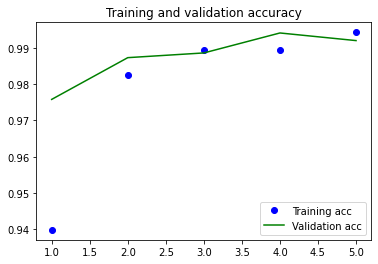

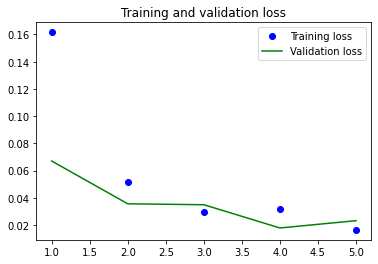

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()